In [1]:
import numpy as np
import utils
from tspheuristics import NearestNeigbour, GenAlgo

In [2]:
cities = utils.read_instance('Inst70.txt')
tsp_inst = utils.dist_mat(cities)

In [3]:
nn1 = NearestNeigbour(tsp_inst)
gen1 = GenAlgo(tsp_inst)

In [4]:
nn1.solve(start=0)

Solución encontrada con costo: 805.5312008437772


In [5]:
gen1.solve()

Solución encontrada con costo: 1597.9498546471932


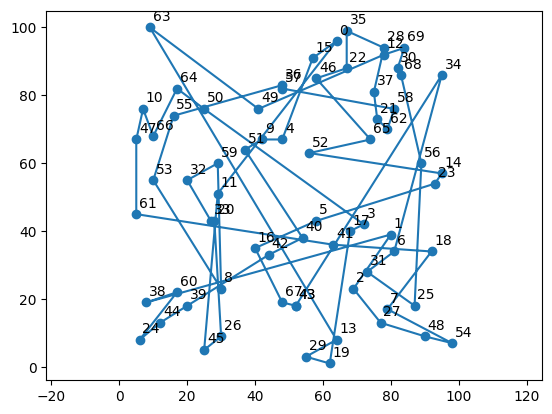

In [6]:
utils.plot_sol(cities, gen1.res)

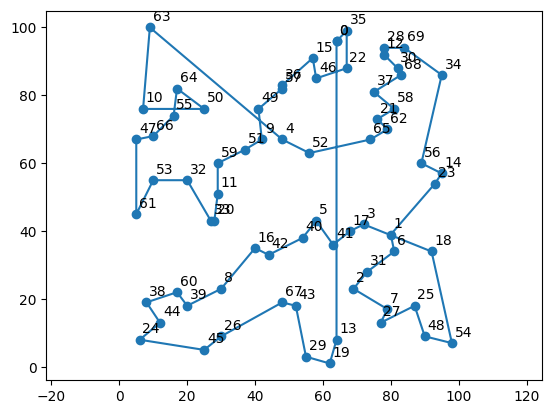

In [7]:
utils.plot_sol(cities,nn1.res)

In [8]:
nn1.cost, gen1.cost

(805.5312008437772, 1597.9498546471932)

## Fuerza bruta

In [9]:
# import itertools

In [10]:
# # Empezamos con la respuesta actual
# min_cost = nn1.cost
# min_res = nn1.res

# for path in list(itertools.permutations(range(len(cities)))):
#     path = list(path)+[path[0]]
#     path = np.array(path)
#     cost = utils.calc_cost(path, tsp_inst)
#     # print(f"Camino: {path}, costo: {cost}")

#     # Si encontramos una mejor solución, la guardamos
#     if cost < min_cost:
#         min_cost = cost
#         min_res = path

# # El mejor camino encontrado
# print(f"El mejor camino tiene costo: {min_cost}")